# MNIST 손글씨 -Convolutional Neural Network ver.3
- Conv2D 2개
- MaxPooling 1개
- DorpOut 2개

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed =2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# 0~1 사이의 값으로 정규화

X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
Y_class_train[0]

5

In [7]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 정의, 설정, 학습

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [9]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout (Dropout)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [10]:
# 모델 실행환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [12]:
# 모델 최적화 설정
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.05636, saving model to ./model/best001-0.0564.hdf5

Epoch 00002: val_loss improved from 0.05636 to 0.04903, saving model to ./model/best002-0.0490.hdf5

Epoch 00003: val_loss improved from 0.04903 to 0.03868, saving model to ./model/best003-0.0387.hdf5

Epoch 00004: val_loss improved from 0.03868 to 0.03532, saving model to ./model/best004-0.0353.hdf5

Epoch 00005: val_loss did not improve from 0.03532

Epoch 00006: val_loss improved from 0.03532 to 0.03313, saving model to ./model/best006-0.0331.hdf5

Epoch 00007: val_loss did not improve from 0.03313

Epoch 00008: val_loss did not improve from 0.03313

Epoch 00009: val_loss improved from 0.03313 to 0.03183, saving model to ./model/best009-0.0318.hdf5

Epoch 00010: val_loss did not improve from 0.03183

Epoch 00011: val_loss did not improve from 0.03183

Epoch 00012: val_loss did not improve from 0.03183

Epoch 00013: val_loss did not improve from 0.03183

Epoch 00014: val_loss did not imp

In [14]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best009-0.0318.hdf5')

In [15]:
# 테스트 정확도 출력
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f'\n Test Accuracy: {acc:.4f}')

313/313 - 1s - loss: 0.0358 - accuracy: 0.9913

 Test Accuracy: 0.9913


### 훈련 과정 시각화

In [16]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

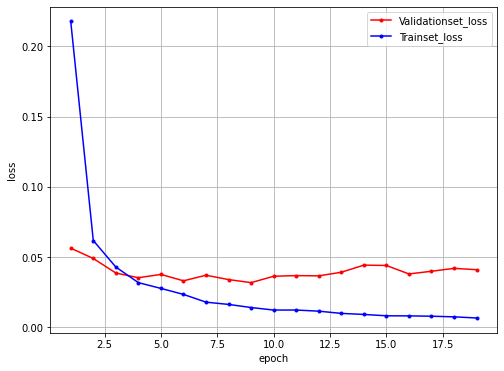

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()